In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage, fft
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler


class LightFluxProcessor:

    def __init__(self, fourier=True, normalize=True, gaussian=True, standardize=True):
        self.fourier = fourier
        self.normalize = normalize
        self.gaussian = gaussian
        self.standardize = standardize

    def fourier_transform(self, X):
        return np.abs(fft.fft(X.values, n=X.size))

    def process(self, df_train_x, df_dev_x):
        # Apply fourier transform
        if self.fourier:
            print("Applying Fourier...")
            shape_train = df_train_x.shape
            shape_dev = df_dev_x.shape
            df_train_x = df_train_x.apply(self.fourier_transform, axis=1)
            df_dev_x = df_dev_x.apply(self.fourier_transform, axis=1)

            df_train_x_build = np.zeros(shape_train)
            df_dev_x_build = np.zeros(shape_dev)

            for ii, x in enumerate(df_train_x):
                df_train_x_build[ii] = x

            for ii, x in enumerate(df_dev_x):
                df_dev_x_build[ii] = x

            df_train_x = pd.DataFrame(df_train_x_build)
            df_dev_x = pd.DataFrame(df_dev_x_build)

            # Keep first half of data as it is symmetrical after previous steps
            df_train_x = df_train_x.iloc[:, : (df_train_x.shape[1] // 2)].values
            df_dev_x = df_dev_x.iloc[:, : (df_dev_x.shape[1] // 2)].values

        # Normalize
        if self.normalize:
            print("Normalizing...")
            df_train_x = pd.DataFrame(normalize(df_train_x))
            df_dev_x = pd.DataFrame(normalize(df_dev_x))

            # df_train_x = df_train_x.div(df_train_x.sum(axis=1), axis=0)
            # df_dev_x = df_dev_x.div(df_dev_x.sum(axis=1), axis=0)

        # Gaussian filter to smooth out data
        if self.gaussian:
            print("Applying Gaussian Filter...")
            df_train_x = ndimage.filters.gaussian_filter(df_train_x, sigma=10)
            df_dev_x = ndimage.filters.gaussian_filter(df_dev_x, sigma=10)

        if self.standardize:
            # Standardize X data
            print("Standardizing...")
            std_scaler = StandardScaler()
            df_train_x = std_scaler.fit_transform(df_train_x)
            df_dev_x = std_scaler.transform(df_dev_x)

        print("Finished Processing!")
        return df_train_x, df_dev_x


2024-12-06 11:03:01.378687: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 11:03:01.428919: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 11:03:01.954358: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 11:03:02.340349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733482982.759221   40571 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733482982.87

Loading datasets...
Applying Fourier...
Normalizing...
Applying Gaussian Filter...


/tmp/ipykernel_40571/346809823.py:55: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  df_train_x = ndimage.filters.gaussian_filter(df_train_x, sigma=10)
/tmp/ipykernel_40571/346809823.py:56: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  df_dev_x = ndimage.filters.gaussian_filter(df_dev_x, sigma=10)


Standardizing...
Finished Processing!
X_train.shape:  (1000, 1598)
Y_train.shape:  (1000, 1)
X_dev.shape:  (200, 1598)
Y_dev.shape:  (200, 1)
n_x:  1598
num_examples:  1000
n_y:  1


2024-12-06 11:03:20.510840: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Applying SMOTE...
After SMOTE: X_train shape: (1978, 1598), Y_train shape: (1978,)
Standardizing data...
Training...
Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9176 - loss: 0.1949 - val_accuracy: 0.9900 - val_loss: 0.6050
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9871 - loss: 0.0822 - val_accuracy: 0.9900 - val_loss: 0.8274
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9871 - loss: 0.0586 - val_accuracy: 0.9900 - val_loss: 0.9156
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9861 - loss: 0.0857 - val_accuracy: 0.9900 - val_loss: 1.0364
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9841 - loss: 0.0819 - val_accuracy: 0.9900 - val_loss: 1.0484
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9903 - loss: 0.0610 - val_accuracy: 0.9900 - val_loss: 1.0798
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9913 - loss: 0.0504 - val_accuracy: 0.9900 - val_loss: 1

/root/anaconda3/envs/acc_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


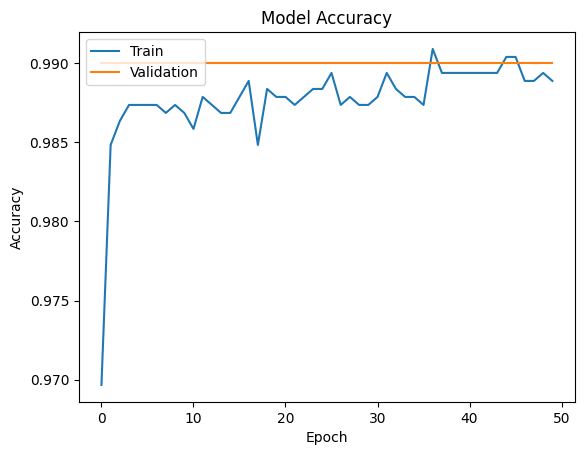

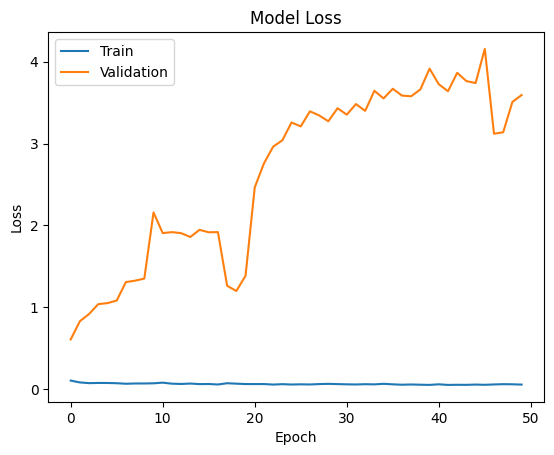

In [2]:
import pandas as pd
import numpy as np

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout

# # from keras.layers.normalization import BatchNormalization
# from keras import metrics

# from keras.callbacks import ModelCheckpoint

from imblearn.over_sampling import SMOTE

from pathlib import Path

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import math
import time

from sklearn.metrics import classification_report

from scipy import ndimage, fft
from sklearn.preprocessing import normalize

# from .preprocess_data import LightFluxProcessor
import tensorflow as tf

np.random.seed(1)

LOAD_MODEL = True  # continue training previous weights or start fresh
RENDER_PLOT = False  # render loss and accuracy plots


def build_network(shape):
    """Build a neural network with Dropout and relu activation."""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape),  # Input layer
        tf.keras.layers.Flatten(),  # Flatten input
        tf.keras.layers.Dense(64, activation="relu"),  # Hidden layer 1
        tf.keras.layers.Dropout(0.2),  # Dropout after hidden layer 1
        tf.keras.layers.Dense(32, activation="relu"),  # Hidden layer 2
        tf.keras.layers.Dropout(0.2),  # Dropout after hidden layer 2
        tf.keras.layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


def np_X_Y_from_df(df):
    df = shuffle(df)
    df_X = df.drop(["LABEL"], axis=1)
    X = np.array(df_X)
    Y_raw = np.array(df["LABEL"]).reshape((len(df["LABEL"]), 1))
    Y = Y_raw == 2
    return X, Y


if __name__ == "__main__":
    train_dataset_path = "/ca24/AstroCode-Collective/data_no_injection/exoTrain.csv"
    dev_dataset_path = "/ca24/AstroCode-Collective/data_no_injection/exoTest.csv"

    print("Loading datasets...")
    
    df_train = pd.read_csv(train_dataset_path, encoding="ISO-8859-1")
    df_dev = pd.read_csv(dev_dataset_path, encoding="ISO-8859-1")
    df_train = df_train.sample(1000)  # Use only 1000 samples for training
    df_dev = df_dev.sample(200)      # Use 200 samples for development
    # Generate X and Y dataframe sets
    df_train_x = df_train.drop("LABEL", axis=1)
    df_dev_x = df_dev.drop("LABEL", axis=1)
    df_train_y = df_train.LABEL
    df_dev_y = df_dev.LABEL

    # Process dataset
    LFP = LightFluxProcessor(
        fourier=True, normalize=True, gaussian=True, standardize=True
    )
    df_train_x, df_dev_x = LFP.process(df_train_x, df_dev_x)

    # Rejoin X and Y
    df_train_processed = pd.DataFrame(df_train_x).join(pd.DataFrame(df_train_y))
    df_dev_processed = pd.DataFrame(df_dev_x).join(pd.DataFrame(df_dev_y))

    # Load X and Y numpy arrays
    X_train, Y_train = np_X_Y_from_df(df_train_processed)
    X_dev, Y_dev = np_X_Y_from_df(df_dev_processed)

    # Print data set stats
    (num_examples, n_x) = (
        X_train.shape
    )  # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[1]  # n_y : output size
    print("X_train.shape: ", X_train.shape)
    print("Y_train.shape: ", Y_train.shape)
    print("X_dev.shape: ", X_dev.shape)
    print("Y_dev.shape: ", Y_dev.shape)
    print("n_x: ", n_x)
    print("num_examples: ", num_examples)
    print("n_y: ", n_y)

    # Build model
    model = build_network(X_train.shape[1:])

    # Load weights
    load_path = ""
    my_file = Path(load_path)
    if LOAD_MODEL and my_file.is_file():
        model.load_weights(load_path)
        print("------------")
        print("Loaded saved weights")
        print("------------")

    print("Applying SMOTE...") 
    sm = SMOTE(random_state=1)
    X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)
    print(f"After SMOTE: X_train shape: {X_train_sm.shape}, Y_train shape: {Y_train_sm.shape}")  # ADJUSTMENT

    # X_train_sm, Y_train_sm = X_train, Y_train
    # adjusted
    print("Standardizing data...")  
    scaler = StandardScaler()  
    X_train_sm = scaler.fit_transform(X_train_sm)  
    X_dev = scaler.transform(X_dev)  

    # Train
    # checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # callbacks_list = [checkpoint]
    print("Training...")
    history = model.fit(X_train_sm, Y_train_sm, epochs=50, batch_size=32, validation_data=(X_dev, Y_dev))
    # Metrics
    print("Evaluating metrics...")
    train_outputs = model.predict(X_train_sm, batch_size=32)
    dev_outputs = model.predict(X_dev, batch_size=32)
    train_outputs = np.rint(train_outputs)
    dev_outputs = np.rint(dev_outputs)
    accuracy_train = accuracy_score(Y_train_sm, train_outputs)
    accuracy_dev = accuracy_score(Y_dev, dev_outputs)
    precision_train = precision_score(Y_train_sm, train_outputs)
    precision_dev = precision_score(Y_dev, dev_outputs)
    recall_train = recall_score(Y_train_sm, train_outputs)
    recall_dev = recall_score(Y_dev, dev_outputs)
    confusion_matrix_train = confusion_matrix(Y_train_sm, train_outputs)
    confusion_matrix_dev = confusion_matrix(Y_dev, dev_outputs)

    # # Save model
    # print("Saving model...")
    # save_weights_path = "checkpoints_v2/weights-recall-{}-{}.weights.h5".format(
    #     recall_train, recall_dev
    # )  # load_path
    # model.save_weights(save_weights_path)
    # save_path = "models_v2/model-recall-{}-{}.weights.h5".format(
    #     recall_train, recall_dev
    # )  # load_path
    # # model.save(save_path)

    print("train set error", 1.0 - accuracy_train)
    print("dev set error", 1.0 - accuracy_dev)
    print("------------")
    print("precision_train", precision_train)
    print("precision_dev", precision_dev)
    print("------------")
    print("recall_train", recall_train)
    print("recall_dev", recall_dev)
    print("------------")
    print("confusion_matrix_train")
    print(confusion_matrix_train)
    print("confusion_matrix_dev")
    print(confusion_matrix_dev)
    print("------------")
    print("Train Set Positive Predictions", np.count_nonzero(train_outputs))
    print("Dev Set Positive Predictions", np.count_nonzero(dev_outputs))
    #  Predicting 0's will give you error:
    print("------------")
    print("All 0's error train set", 37 / 5087)
    print("All 0's error dev set", 5 / 570)

    print("------------")
    print("------------")

    results = {
    "NN Model": {
        "precision_train": precision_train,  # Corrected variable name
        "precision_dev": precision_dev,
        "recall_train": recall_train,  # Corrected variable name
        "recall_dev": recall_dev,
        "confusion_matrix_train": confusion_matrix_train,  # Corrected variable name
        "confusion_matrix_dev": confusion_matrix_dev,
    }
}

# Save metrics to a txt file using the given format
report_file_path = "report_no_injection_assignment2_taskF.txt"
with open(report_file_path, "w") as report_file:
    report_file.write("Report on Neural Network for Kepler Data\n")
    report_file.write("----------------------------------------------------\n")

    for model, metrics in results.items():
        report_file.write(f"\nModel: {model}\n")
        report_file.write(f"Precision - Train Set: {metrics['precision_train']}\n")
        report_file.write(f"Precision - Dev Set: {metrics['precision_dev']}\n")
        report_file.write("Confusion Matrix - Train Set:\n")
        report_file.write(f"{metrics['confusion_matrix_train']}\n")
        report_file.write("Confusion Matrix - Dev Set:\n")
        report_file.write(f"{metrics['confusion_matrix_dev']}\n")
        report_file.write("----------------------------------------------------\n")



    #    Save model
#if RENDER_PLOT:
    print(history.history.keys())  # List all keys in the history
    plt.plot(history.history["accuracy"])
    plt.plot(history.history.get("val_accuracy", []))  # Use val_accuracy
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()

    plt.plot(history.history["loss"])
    plt.plot(history.history.get("val_loss", []))  # Use val_loss
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()

# Save Report (Fix Print Statement Placement)
#print(f"Metrics report saved to {report_file_path}")

# Save Model and Weights
#save_weights_path = "model_weights.weights.h5"
#save_model_path = "model.h5"
#print("Saving model...")
#model.save_weights(save_weights_path)
#print(f"Model and weights saved to {save_model_path} and {save_weights_path}")
#model.save(save_model_path)